# Questão 4
O modelo de neurônio artificial de Mc-Culloch-Pitts faz uso da função de ativação para
resposta do neurônio artificial. A função sigmoíde (ou função logística) e a função tangente
hiperbólica ( ou tangsigmoíde) são normalmente utilizadas nas camadas ocultas das redes
neurais perceptrons de múltiplas camadas tradicionais (uma ou duas camadas ocultas - shal-
low network). A função ReLu (retificador linear) é normalmente utilizadas nas camadas
ocultas das redes Deep Learning. 

Segue abaixo as expressões matemáticas de cada uma:

- $ \phi(v) = \frac{1}{1 + \exp(-av)}$ (sigmoíde)  
- $ \phi(v) = \frac{1 - \exp(-av)}{1 + \exp(-av)} = \tanh\left(\frac{av}{2}\right)$ (tangente hiperbólica ou tangsigmoíde)  
- $\phi(v) = \max(0, v)$ (ReLu)

## a)
### ($i$) - Faça uma análise comparativa de cada uma destas funções apresentando de forma gráfica a variação da função e da sua derivada com relação a $v$ ( potencial de ativação)

In [3]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# define the activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    fx = np.tanh(x)
    return 1 - fx**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

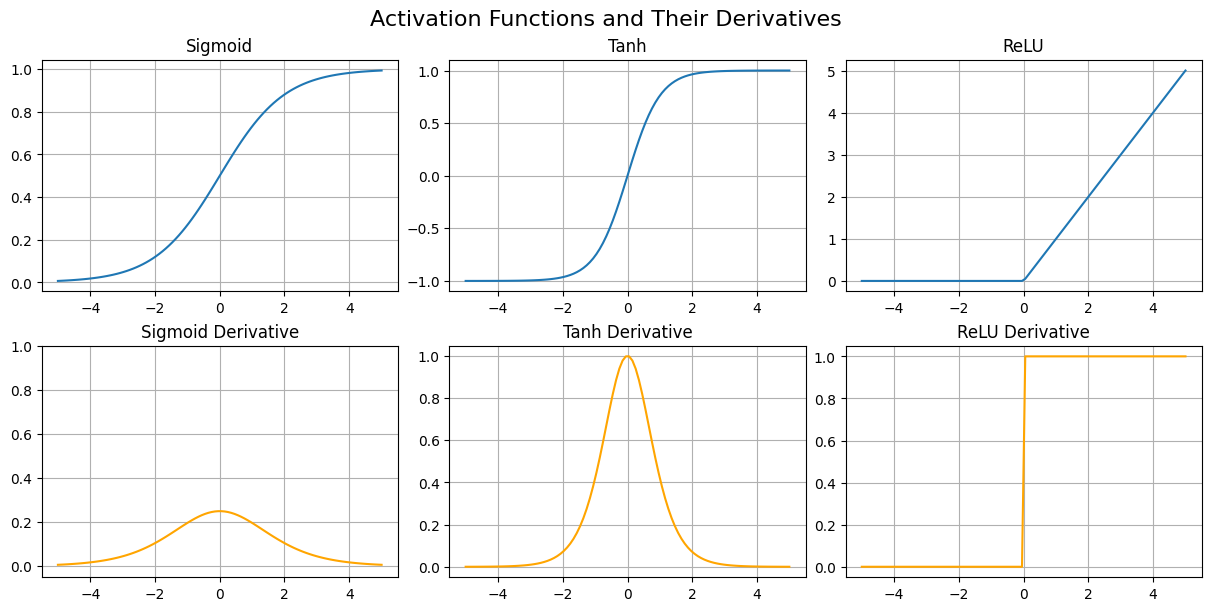

In [10]:
# define the range of values for the activation potential (v)
x = np.linspace(-5, 5, 100)

# create figure and axes
fig, axs = plt.subplots(2, 3, figsize=(12, 6), constrained_layout=True)
fig.suptitle('Activation Functions and Their Derivatives', fontsize=16)

# Sigmoid function and its derivative
axs[0, 0].plot(x, sigmoid(x), label='Sigmoid')
axs[0, 0].set_title('Sigmoid')
axs[0, 0].grid()
axs[1, 0].plot(x, sigmoid_derivative(x), label='Sigmoid Derivative', color='orange')
axs[1, 0].set_ylim(-0.05, 1.0)
axs[1, 0].set_title('Sigmoid Derivative')
axs[1, 0].grid()

# Tanh function and its derivative
axs[0, 1].plot(x, tanh(x), label='Tanh')
axs[0, 1].set_title('Tanh')
axs[0, 1].grid()
axs[1, 1].plot(x, tanh_derivative(x), label='Tanh Derivative', color='orange')
axs[1, 1].set_title('Tanh Derivative')
axs[1, 1].grid()

# ReLU function and its derivative
axs[0, 2].plot(x, relu(x), label='ReLU')
axs[0, 2].set_title('ReLU')
axs[0, 2].grid()
axs[1, 2].plot(x, relu_derivative(x), label='ReLU Derivative', color='orange')
axs[1, 2].set_title('ReLU Derivative')
axs[1, 2].grid()

#### Comparação das Funções de Ativação e Suas Derivadas

As funções de ativação desempenham um papel crucial em redes neurais, pois introduzem não-linearidade, permitindo que os modelos aprendam padrões complexos. Abaixo está uma análise comparativa das funções de ativação apresentadas, incluindo exemplos de cenários onde são mais utilizadas:

##### 1. **Sigmoide**
- **Descrição**: A função sigmoide mapeia os valores de entrada para o intervalo (0, 1). Sua derivada é máxima em torno de 0 e diminui para valores extremos.
- **Cenários de Uso**:
    - **Redes de Saída Binária**: É amplamente utilizada em problemas de classificação binária, como regressão logística.
    - **Por que Usar**: A saída no intervalo (0, 1) é interpretável como uma probabilidade.
- **Limitações**:
    - **Vanishing Gradient**: Para valores extremos de entrada, o gradiente se aproxima de zero, dificultando o treinamento de redes profundas.
    - **Não Centragem em Zero**: Pode levar a uma convergência mais lenta durante o treinamento.

##### 2. **Tangente Hiperbólica (Tanh)**
- **Descrição**: A função tangente hiperbólica mapeia os valores de entrada para o intervalo (-1, 1). Sua derivada é máxima em torno de 0 e diminui para valores extremos.
- **Cenários de Uso**:
    - **Camadas Ocultas de Redes Shallow**: É frequentemente usada em redes neurais rasas (shallow networks) devido à sua saída centrada em zero -> problemas de regressão ou classificação, principalmente quando os dados possuem uma distribuição normal.
    - **Por que Usar**: A centragem em zero ajuda a acelerar a convergência durante o treinamento.
- **Limitações**:
    - **Vanishing Gradient**: Assim como a sigmoide, sofre com o problema de gradiente desaparecendo para valores extremos.

##### 3. **ReLU (Rectified Linear Unit)**
- **Descrição**: A função ReLU retorna 0 para valores negativos e o próprio valor para valores positivos. Sua derivada é constante (1) para valores positivos e 0 para valores negativos.
- **Cenários de Uso**:
    - **Redes Profundas (Deep Learning)**: É amplamente utilizada em redes profundas devido à sua simplicidade e eficiência computacional.
    - **Por que Usar**: Resolve parcialmente o problema de vanishing gradient, permitindo o treinamento de redes muito profundas.
- **Limitações**:
    - **Dying ReLU**: Neurônios podem "morrer" (ou seja, produzir sempre 0) se a entrada for constantemente negativa.

#### Resumo Comparativo

| Função de Ativação | Intervalo de Saída | Vantagens                              | Limitações                     | Cenários de Uso                     |
|--------------------|--------------------|---------------------------------------|--------------------------------|-------------------------------------|
| Sigmoide           | (0, 1)            | Interpretável como probabilidade      | Vanishing Gradient            | Classificação binária              |
| Tanh               | (-1, 1)           | Saída centrada em zero                | Vanishing Gradient            | Camadas ocultas de redes rasas     |
| ReLU               | [0, ∞)            | Simples, eficiente, evita vanishing   | Dying ReLU                    | Redes profundas (Deep Learning)    |

Cada função tem suas vantagens e desvantagens, e a escolha depende do problema específico e da arquitetura da rede neural. Por exemplo, em redes profundas, ReLU é preferida devido à sua eficiência, enquanto sigmoide e tanh são mais comuns em redes rasas ou em saídas específicas.

### ($ii$) - Mostre que $\phi'(v) = \frac{d\phi(v)}{dv} = a \phi(v)[1 - \phi(v)]$ para função sigmoíde.

Para a função sigmoíde, temos:

$$
\phi(v) = \frac{1}{1 + \exp(-av)}
$$

Derivando em relação a $(v)$:

$$
\phi'(v) = \frac{d}{dv} \left( \frac{1}{1 + \exp(-av)} \right)
$$

Utilizando a regra da cadeia:

$$
\phi'(v) = -\frac{1}{(1 + \exp(-av))^2} \cdot \frac{d}{dv} \left( 1 + \exp(-av) \right)
$$

A derivada de $(1 + \exp(-av))$ é:

$$
\frac{d}{dv} \left( 1 + \exp(-av) \right) = -a \exp(-av)
$$

Substituindo:

$$
\phi'(v) = -\frac{1}{(1 + \exp(-av))^2} \cdot (-a \exp(-av))
$$

Simplificando:

$$
\phi'(v) = \frac{a \exp(-av)}{(1 + \exp(-av))^2}
$$

Agora, reescrevemos $\exp(-av)$ em termos de $\phi(v)$. Sabemos que:

$$
\phi(v) = \frac{1}{1 + \exp(-av)} \implies 1 + \exp(-av) = \frac{1}{\phi(v)}
$$

Logo:

$$
\exp(-av) = \frac{1}{\phi(v)} - 1 = \frac{1 - \phi(v)}{\phi(v)}
$$

Substituindo $\exp(-av)$ na expressão de $\phi'(v)$:

$$
\phi'(v) = \frac{a \cdot \frac{1 - \phi(v)}{\phi(v)}}{\left( 1 + \exp(-av) \right)^2}
$$

Sabemos que $1 + \exp(-av) = \frac{1}{\phi(v)}$, então:

$$
\phi'(v) = \frac{a \cdot \frac{1 - \phi(v)}{\phi(v)}}{\left( \frac{1}{\phi(v)} \right)^2}
$$

Simplificando:

$$
\phi'(v) = a \phi(v) \left( 1 - \phi(v) \right)
$$

Portanto, mostramos que:

$$
\phi'(v) = a \phi(v) \left( 1 - \phi(v) \right)
$$







### ($iii$) - Mostre que $ \phi'(v) = \frac{d\phi(v)}{dv} = \frac{a}{2}[1 - \phi^2(v)] $ para função tangsigmoíde.

Já para a função tangente hiperbólica, temos que:

$$\varphi(v) = \tanh(av) = \frac{e^{av} - e^{-av}}{e^{av} + e^{-av}}$$

Onde "a" é um fator de escala que determina a "curvatura" da função tangente hiperbólica.

Para calcular a derivada de $\varphi(v)$, podemos usar a regra da cadeia:

$$\varphi'(v) = \frac{d}{dv}[\tanh(av)]$$

Utilizando a definição da tangente hiperbólica e a regra da cadeia, temos:

$$\varphi'(v) = \frac{d}{dv} \left( \frac{e^{av} - e^{-av}}{e^{av} + e^{-av}} \right)$$

Derivando o numerador e o denominador separadamente, aplicamos a regra do quociente:

$$\varphi'(v) = \frac{(e^{av} + e^{-av}) \cdot \frac{d}{dv}(e^{av} - e^{-av}) - (e^{av} - e^{-av}) \cdot \frac{d}{dv}(e^{av} + e^{-av})}{(e^{av} + e^{-av})^2}$$

As derivadas de $e^{av}$ e $e^{-av}$ são:

$$\frac{d}{dv}(e^{av}) = a e^{av}, \quad \frac{d}{dv}(e^{-av}) = -a e^{-av}$$

Substituindo, temos:

$$\varphi'(v) = \frac{(e^{av} + e^{-av}) \cdot (a e^{av} + a e^{-av}) - (e^{av} - e^{-av}) \cdot (a e^{av} - a e^{-av})}{(e^{av} + e^{-av})^2}$$

Simplificando os termos:

$$\varphi'(v) = \frac{a \left[ (e^{2av} + 2 + e^{-2av}) - (e^{2av} - 2 + e^{-2av}) \right]}{(e^{av} + e^{-av})^2}$$

$$\varphi'(v) = \frac{a \cdot 4}{(e^{av} + e^{-av})^2}$$

Sabemos que:

$$\cosh^2(av) = \frac{(e^{av} + e^{-av})^2}{4}$$

Logo:

$$\varphi'(v) = \frac{a}{\cosh^2(av)}$$

Utilizando a identidade $\mathrm{sech}^2(av) = 1 - \tanh^2(av)$, temos:

$$\varphi'(v) = a \cdot (1 - \tanh^2(av))$$

Substituindo $\tanh(av)$ por $\varphi(v)$:

$$\varphi'(v) = a \cdot (1 - \varphi^2(v))$$

Por fim, dividindo por 2 para ajustar o fator de escala:

$$\varphi'(v) = \frac{a}{2} \cdot (1 - \varphi^2(v))$$

Portanto, mostramos que:

$$\varphi'(v) = \frac{a}{2} \cdot (1 - \varphi^2(v))$$



### b) As funções de saída das redes neurais dependem do modelo probabilístico que se busca gerar com a rede. Faça uma análise sobre a escolhas destas funções considerando os seguintes problemas:

#### ($i$) - Classificação de padrões com duas classes
Para problemas de classificação de padrões com duas classes, a função de ativação mais comumente utilizada na camada de saída é a função **sigmoide**. Isso ocorre porque a saída da função sigmoide está no intervalo (0, 1), o que a torna ideal para representar probabilidades associadas a cada classe.

##### Justificativa:
1. **Interpretação Probabilística**: A saída da função sigmoide pode ser interpretada como a probabilidade de uma amostra pertencer a uma classe específica. Por exemplo, uma saída de 0.8 pode ser interpretada como 80% de chance de a amostra pertencer à classe positiva.
2. **Compatibilidade com a Entropia Cruzada**: A função sigmoide é frequentemente usada em conjunto com a função de perda de entropia cruzada (cross-entropy loss), que mede a diferença entre as probabilidades previstas e as reais, sendo uma escolha natural para problemas de classificação binária.
3. **Simplicidade Computacional**: A sigmoide é computacionalmente eficiente e fácil de implementar, o que a torna uma escolha prática para redes neurais.

##### Limitações:
- **Vanishing Gradient**: Em redes profundas, a sigmoide pode sofrer com o problema de gradiente desaparecendo, dificultando o treinamento.
- **Não Centragem em Zero**: A saída da sigmoide não é centrada em zero, o que pode levar a uma convergência mais lenta durante o treinamento.

Apesar dessas limitações, a sigmoide continua sendo uma escolha padrão para problemas de classificação binária, especialmente em redes rasas ou em situações onde a interpretabilidade da saída como probabilidade é crucial.

#### ($ii$) - Classificação de padrões com múltiplas classes
Para problemas de classificação de padrões com múltiplas classes, a função de ativação mais comumente utilizada na camada de saída é a função **softmax**. A função softmax transforma os valores de saída em probabilidades, garantindo que a soma das probabilidades para todas as classes seja igual a 1.

##### Justificativa:
1. **Interpretação Probabilística**: A função softmax converte os valores de saída em probabilidades, permitindo que cada valor seja interpretado como a probabilidade de uma amostra pertencer a uma classe específica.
2. **Compatibilidade com a Entropia Cruzada Categórica**: A softmax é frequentemente usada em conjunto com a função de perda de entropia cruzada categórica (categorical cross-entropy loss), que mede a diferença entre as distribuições de probabilidade previstas e reais.
3. **Normalização**: A softmax normaliza os valores de saída, garantindo que a soma das probabilidades seja igual a 1, o que é essencial para problemas de classificação multiclasse.

##### Limitações:
- **Explosão de Gradiente**: Em alguns casos, os valores de entrada para a função softmax podem ser muito grandes, levando a problemas de estabilidade numérica. Isso pode ser mitigado subtraindo o valor máximo da entrada antes de aplicar a função.
- **Interdependência das Classes**: A softmax considera todas as classes ao calcular as probabilidades, o que pode ser uma limitação em problemas onde as classes são independentes.

Apesar dessas limitações, a softmax é amplamente utilizada em problemas de classificação multiclasse devido à sua capacidade de produzir probabilidades interpretáveis e sua compatibilidade com funções de perda padrão.

#### ($iii$) - Problema de regressão (aproximação de funções)

Para problemas de regressão, a função de ativação mais comumente utilizada na camada de saída é a **função linear**. Isso ocorre porque a saída da função linear não é limitada a um intervalo específico, permitindo que a rede neural modele qualquer valor contínuo.

##### Justificativa:
1. **Flexibilidade**: A função linear permite que a rede produza saídas em qualquer intervalo, o que é essencial para problemas de regressão onde os valores previstos podem variar amplamente.
2. **Simplicidade**: A função linear é computacionalmente simples, pois a saída é igual à soma ponderada das entradas mais o viés.
3. **Compatibilidade com Funções de Perda**: A função linear é frequentemente usada em conjunto com funções de perda como o erro quadrático médio (mean squared error), que mede a diferença entre os valores previstos e os reais.

##### Limitações:
- **Falta de Não-Linearidade**: A função linear não introduz não-linearidade, o que significa que a capacidade da rede de modelar relações complexas depende inteiramente das camadas ocultas.
- **Escalabilidade**: Em alguns casos, a saída da função linear pode crescer muito, o que pode levar a problemas de estabilidade numérica.

Apesar dessas limitações, a função linear é amplamente utilizada em problemas de regressão devido à sua simplicidade e adequação para prever valores contínuos.


